In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")

In [3]:
x=dataset.iloc[:,[3,4]].values

In [4]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [5]:
from sklearn.cluster import estimate_bandwidth 
bandwidth = estimate_bandwidth(x, quantile=0.2, n_samples=30)

In [6]:
from sklearn.cluster import MeanShift
MS=MeanShift(bandwidth=bandwidth, bin_seeding=False)
clusout=MS.fit_predict(x)


In [7]:
unsupervised=dataset
unsupervised['cluster group']=clusout
unsupervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


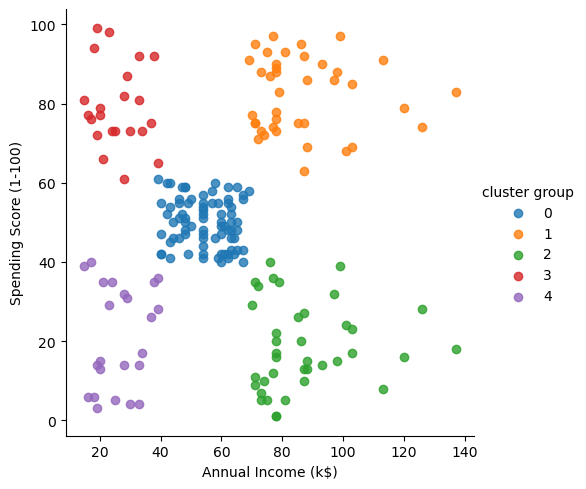

In [8]:
import seaborn as sb
facet=sb.lmplot(data=unsupervised,x=unsupervised.columns[3],y=unsupervised.columns[4],hue=unsupervised.columns[5],fit_reg=False,legend=True,legend_out=True)

In [9]:
from sklearn.metrics import silhouette_score
ss=silhouette_score(x,clusout)
ss

0.5519530013851748